We will construct a linear model that explains the relationship a car's Price has with its other attributes

## Import Libraries

In [1]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

## Load and review data

In [2]:
cData = pd.read_csv("used_cars_data.csv")  
cData.shape

(7253, 14)

In [3]:
# 8 variables: 
# S.No.
# Name
# Location
# Year
# Kilometers_Driven
# Fuel_Type
# Transmission
# Owner_Type
# Mileage Engine
# Power
# Seats
# New_Price
# Price
# Missing data values are marked by series of NaN marks.
cData.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [4]:
def func(strr):
    a=strr.split(' ')
    for i in a:
        if i !='0' and i!='':
            return i


# #dropping/ignoring car_name 
cData = cData.drop(['S.No.'], axis=1)
cData.head()
cData['Name']=cData['Name'].apply(func)
cData


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN
7249,Volkswagen,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN
7250,Nissan,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN
7251,Volkswagen,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN


In [5]:
#A quick summary of the data columns
cData.describe()
# Name,Location,Fuel_Type,Transmission,Owner_Type is missing cause it does not seem to be 
# recognized as a numerical column!

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
count,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
mean,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.279722,22.624205,9.479468
std,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.811660,27.437394,11.187917
min,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,1.580000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,7.880000,3.500000
50%,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,11.540000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,25.697500,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000


In [6]:
# checking the datatype for each column.
cData.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price            float64
Price                float64
dtype: object

In [7]:
#check if there are any null values
# Contains the null values in following colunmns
# Mileage                 2
# Engine                 46
# Power                 175
# Seats                  53
# New_Price            6247
# Price                1234
cData.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64

# Exploratory Analysis
### What % of cars belong to a specific location
This chart shows the % of car belonging to each location.

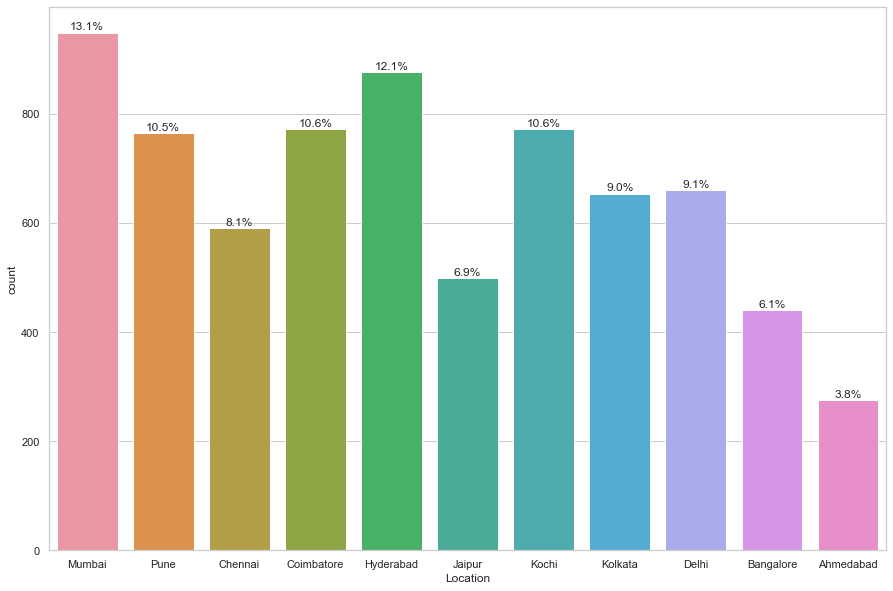

In [8]:
#set chart style
sns.set(rc={'figure.figsize':(15,10)})
sns.set(style="whitegrid")
#create figure from plt
# plt.figure(figsize=(8,12))
#get the size of dataset
total = float(len(cData))
#create chart ax with column sex and datasource equals to dataset
ax = sns.countplot(x="Location", data=cData)
#calculate the percentage and put it on the top of bars with below code
for p in ax.patches:
    #how the percentage should be formated
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    # % position in X
    x = p.get_x() + 0.4
    # % position in Y
    y = p.get_height()+5
    #put percentage on chart
    ax.annotate(percentage, (x, y),ha='center')
#plot the chart
plt.show()

# Exploratory Analysis
### What % of cars belong to each year.
This chart shows the % of models belong to each for year.

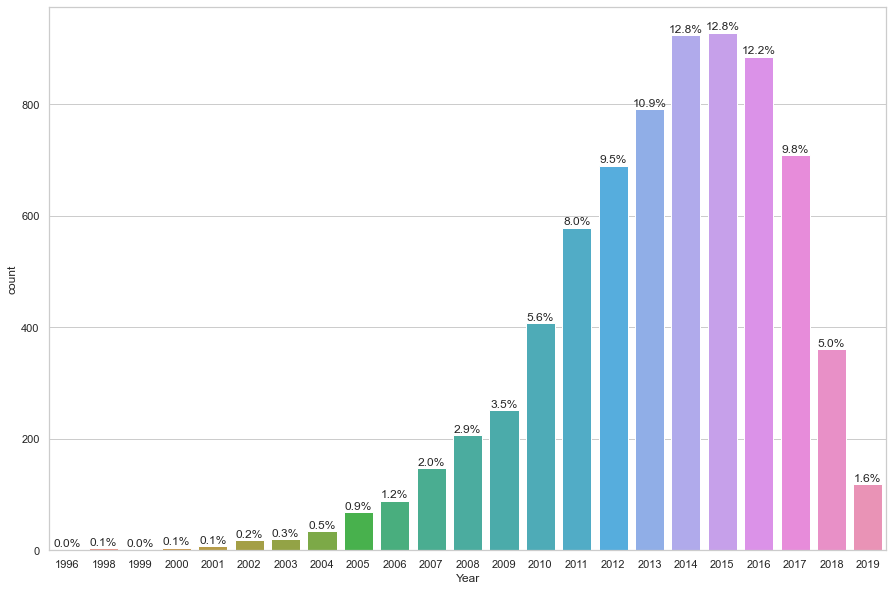

In [9]:
#set chart style
sns.set(rc={'figure.figsize':(15,10)})
sns.set(style="whitegrid")
#create figure from plt
# plt.figure(figsize=(8,12))
#get the size of dataset
total = float(len(cData))
#create chart ax with column sex and datasource equals to dataset
ax = sns.countplot(x="Year", data=cData)
#calculate the percentage and put it on the top of bars with below code
for p in ax.patches:
    #how the percentage should be formated
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    # % position in X
    x = p.get_x() + 0.4
    # % position in Y
    y = p.get_height()+5
    #put percentage on chart
    ax.annotate(percentage, (x, y),ha='center')
#plot the chart
plt.show()

# Exploratory Analysis
### What % of cars belong to a specific fuel type
This chart shows the % of car belonging to each fuel type.

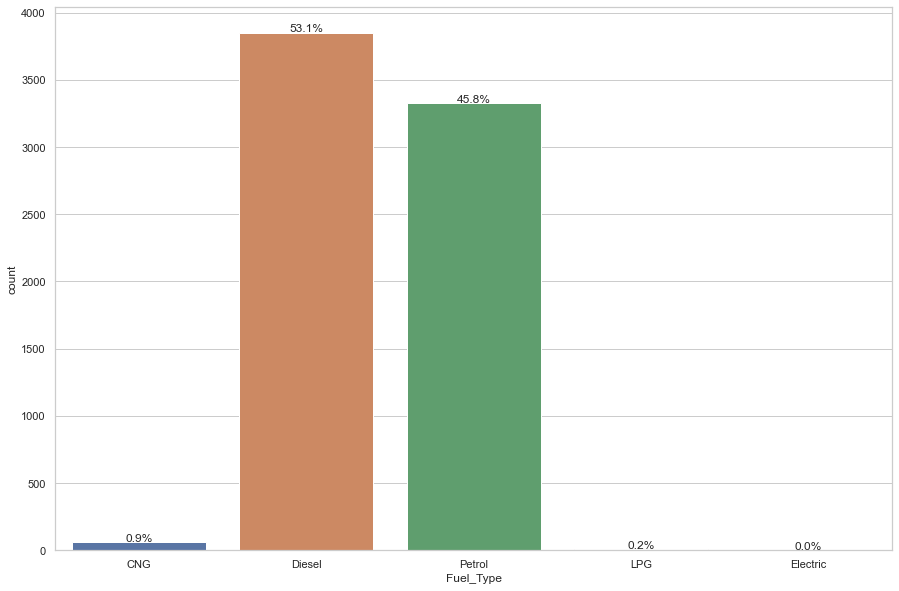

In [10]:
#set chart style
sns.set(rc={'figure.figsize':(15,10)})
sns.set(style="whitegrid")
#create figure from plt
# plt.figure(figsize=(8,12))
#get the size of dataset
total = float(len(cData))
#create chart ax with column sex and datasource equals to dataset
ax = sns.countplot(x="Fuel_Type", data=cData)
#calculate the percentage and put it on the top of bars with below code
for p in ax.patches:
    #how the percentage should be formated
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    # % position in X
    x = p.get_x() + 0.4
    # % position in Y
    y = p.get_height()+5
    #put percentage on chart
    ax.annotate(percentage, (x, y),ha='center')
#plot the chart
plt.show()

# Exploratory Analysis
### What % of cars belong to a specific Transmission type
This chart shows the % of car belonging to each transmission type.

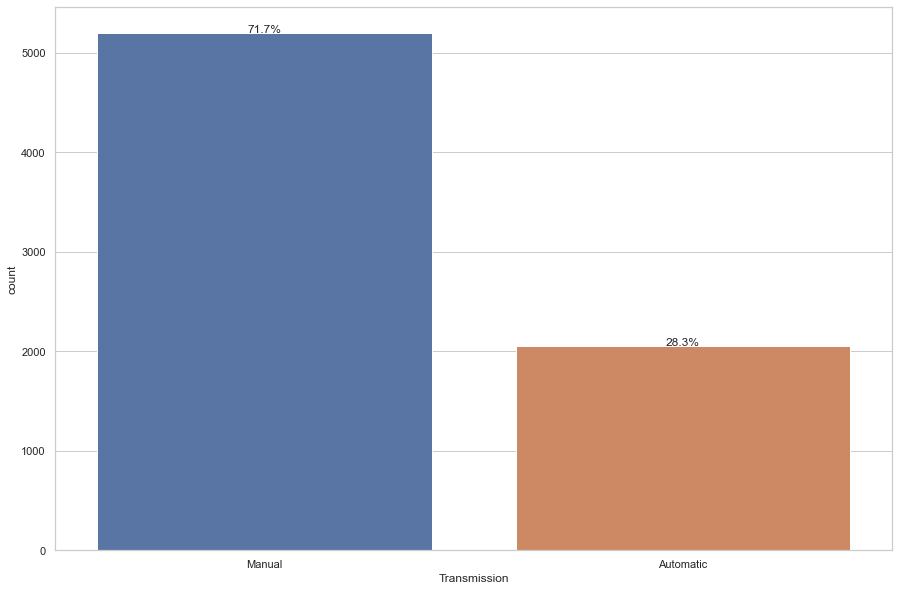

In [11]:
#set chart style
sns.set(rc={'figure.figsize':(15,10)})
sns.set(style="whitegrid")
#create figure from plt
# plt.figure(figsize=(8,12))
#get the size of dataset
total = float(len(cData))
#create chart ax with column sex and datasource equals to dataset
ax = sns.countplot(x="Transmission", data=cData)
#calculate the percentage and put it on the top of bars with below code
for p in ax.patches:
    #how the percentage should be formated
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    # % position in X
    x = p.get_x() + 0.4
    # % position in Y
    y = p.get_height()+5
    #put percentage on chart
    ax.annotate(percentage, (x, y),ha='center')
#plot the chart
plt.show()

# Exploratory Analysis
### What % of cars belong to a specific Owner type
This chart shows the % of car belonging to each owner type.

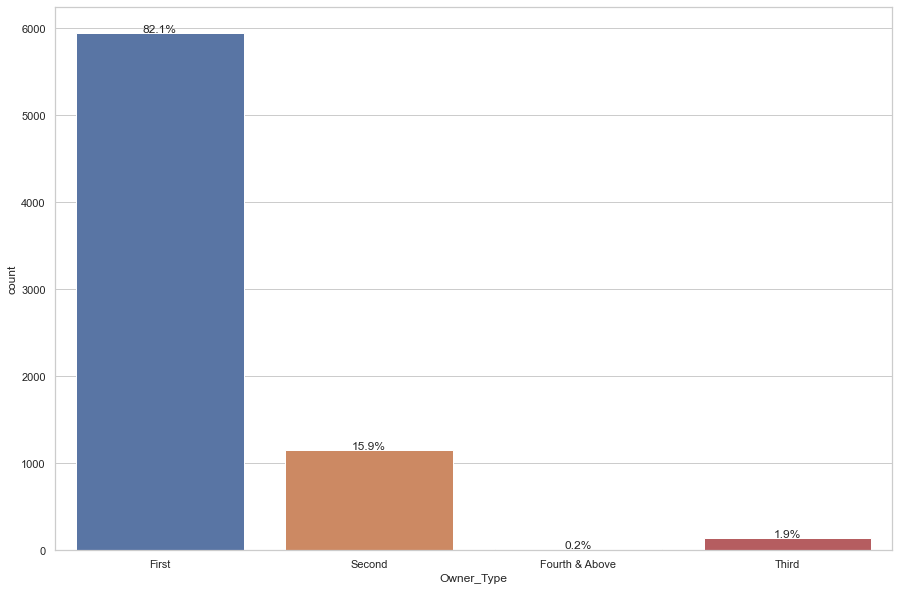

In [12]:
#set chart style
sns.set(rc={'figure.figsize':(15,10)})
sns.set(style="whitegrid")
#create figure from plt
# plt.figure(figsize=(8,12))
#get the size of dataset
total = float(len(cData))
#create chart ax with column sex and datasource equals to dataset
ax = sns.countplot(x="Owner_Type", data=cData)
#calculate the percentage and put it on the top of bars with below code
for p in ax.patches:
    #how the percentage should be formated
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    # % position in X
    x = p.get_x() + 0.4
    # % position in Y
    y = p.get_height()+5
    #put percentage on chart
    ax.annotate(percentage, (x, y),ha='center')
#plot the chart
plt.show()

# Exploratory Analysis
### What % of cars has a specific number of seats
This chart shows the % of car having specific number of seats.

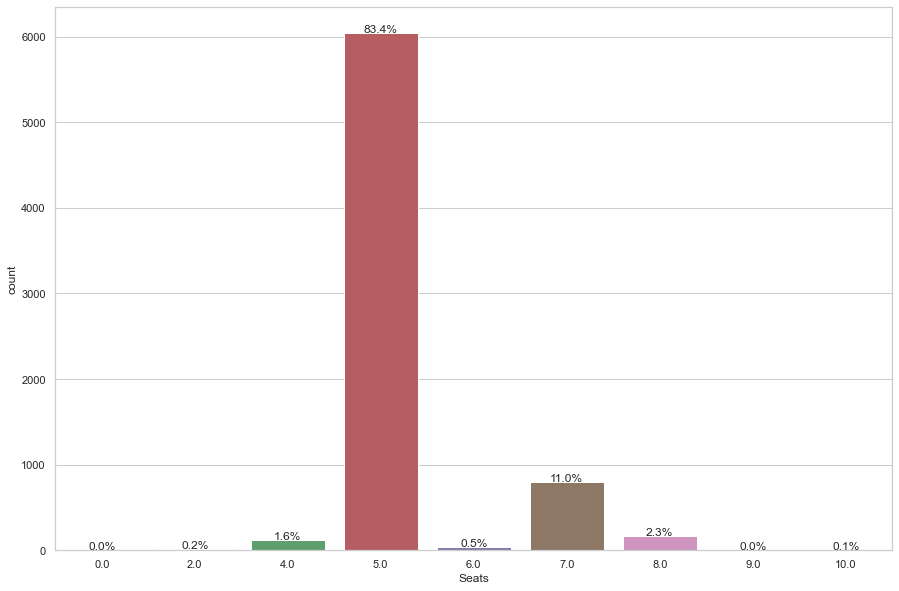

In [13]:
#set chart style
sns.set(rc={'figure.figsize':(15,10)})
sns.set(style="whitegrid")
#create figure from plt
# plt.figure(figsize=(8,12))
#get the size of dataset
total = float(len(cData))
#create chart ax with column sex and datasource equals to dataset
ax = sns.countplot(x="Seats", data=cData)
#calculate the percentage and put it on the top of bars with below code
for p in ax.patches:
    #how the percentage should be formated
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    # % position in X
    x = p.get_x() + 0.4
    # % position in Y
    y = p.get_height()+5
    #put percentage on chart
    ax.annotate(percentage, (x, y),ha='center')
#plot the chart
plt.show()

# Exploratory Analysis
### Mileage
#### Histogram and Boxplot for Mileage
1. It shows average Mileage of a car
2. It shows the frequency of Mileage for the cars

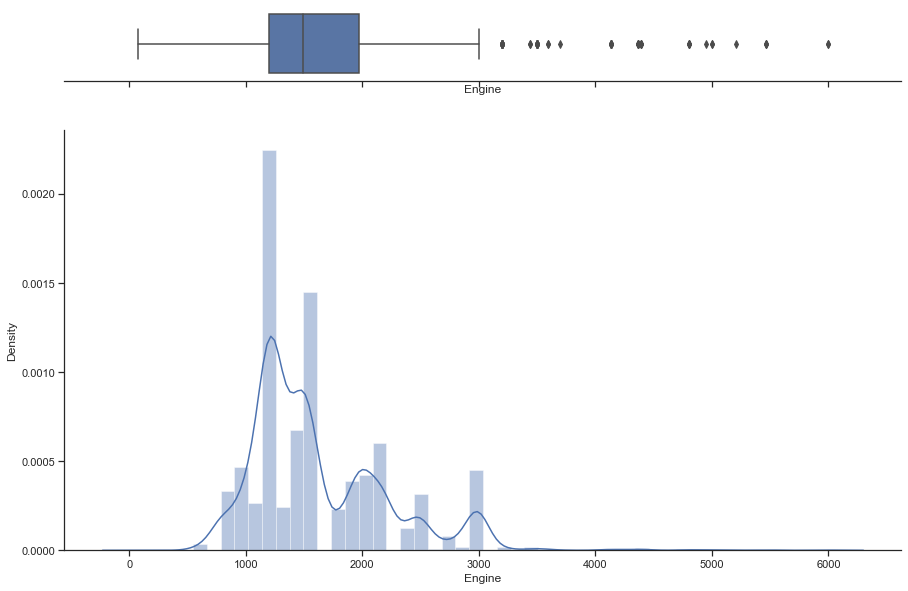

In [14]:
#import warning to supress in out
import warnings
#supress warning 
warnings.filterwarnings('ignore')
#set plot style
sns.set(style="ticks")
#set x equals to column of our interest which is age here
x=cData['Engine']
#create figure f, boxplot and histogram in single chart        
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})
#set input in boxplot
sns.boxplot(x, ax=ax_box)
#set input in histogram
sns.distplot(x, ax=ax_hist)
ax_box.set(yticks=[])
#plot the histogram
sns.despine(ax=ax_hist)
#plot the  boxplot 
sns.despine(ax=ax_box, left=True)

# Exploratory Analysis
### Engine
Histogram and Boxplot for Engine

1. It shows average Engine value in CC of a car
2. It shows the frequency of Engine values for the car

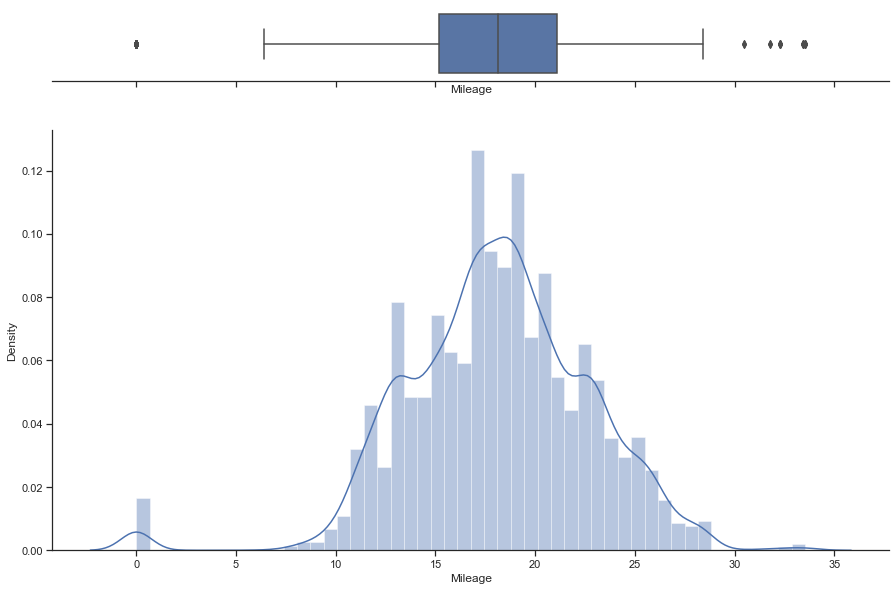

In [15]:
#import warning to supress in out
import warnings
#supress warning 
warnings.filterwarnings('ignore')
#set plot style
sns.set(style="ticks")
#set x equals to column of our interest which is age here
x=cData['Mileage']
#create figure f, boxplot and histogram in single chart        
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})
#set input in boxplot
sns.boxplot(x, ax=ax_box)
#set input in histogram
sns.distplot(x, ax=ax_hist)
ax_box.set(yticks=[])
#plot the histogram
sns.despine(ax=ax_hist)
#plot the  boxplot 
sns.despine(ax=ax_box, left=True)

# Exploratory Analysis
### Year
#### Histogram and Boxplot for Year
1. It shows average year of an car
2. It shows the frequency of years for the cars

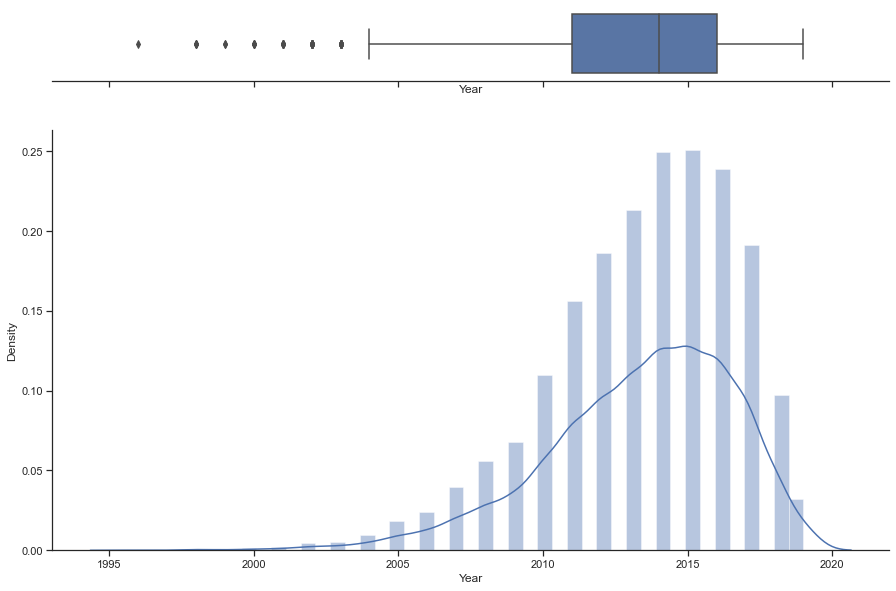

In [16]:
#import warning to supress in out
import warnings
#supress warning 
warnings.filterwarnings('ignore')
#set plot style
sns.set(style="ticks")
#set x equals to column of our interest which is age here
x=cData['Year']
#create figure f, boxplot and histogram in single chart        
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})
#set input in boxplot
sns.boxplot(x, ax=ax_box)
#set input in histogram
sns.distplot(x, ax=ax_hist)
ax_box.set(yticks=[])
#plot the histogram
sns.despine(ax=ax_hist)
#plot the  boxplot 
sns.despine(ax=ax_box, left=True)

# Exploratory Analysis
### Power
#### Histogram and Boxplot for Power
1. It shows average Power of a car
2. It shows the frequency of Power for the cars

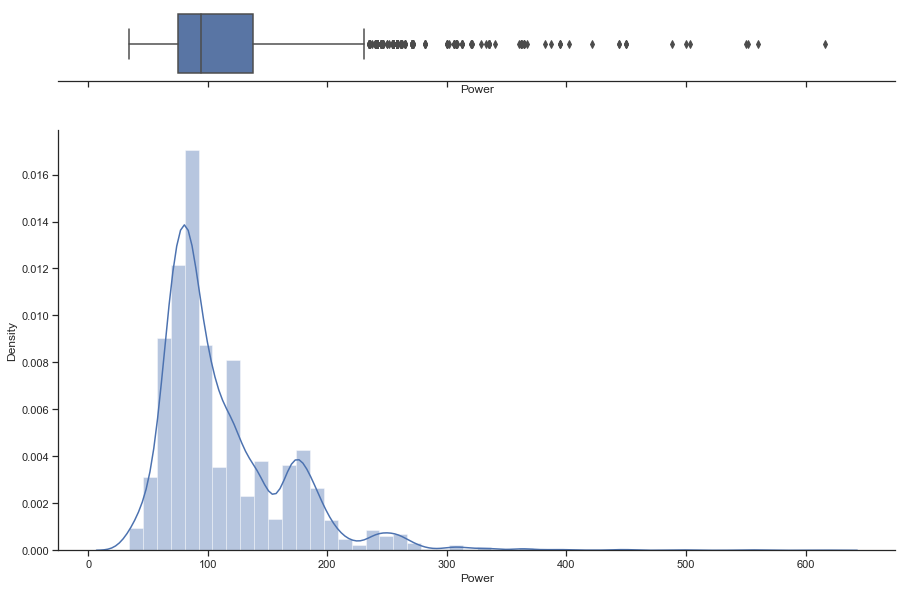

In [17]:
#import warning to supress in out
import warnings
#supress warning 
warnings.filterwarnings('ignore')
#set plot style
sns.set(style="ticks")
#set x equals to column of our interest which is age here
x=cData['Power']
#create figure f, boxplot and histogram in single chart        
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})
#set input in boxplot
sns.boxplot(x, ax=ax_box)
#set input in histogram
sns.distplot(x, ax=ax_hist)
ax_box.set(yticks=[])
#plot the histogram
sns.despine(ax=ax_hist)
#plot the  boxplot 
sns.despine(ax=ax_box, left=True)

# Exploratory Analysis
### Price
#### Histogram and Boxplot for Price
1. It shows average Price of a car
2. It shows the frequency of Price for the cars

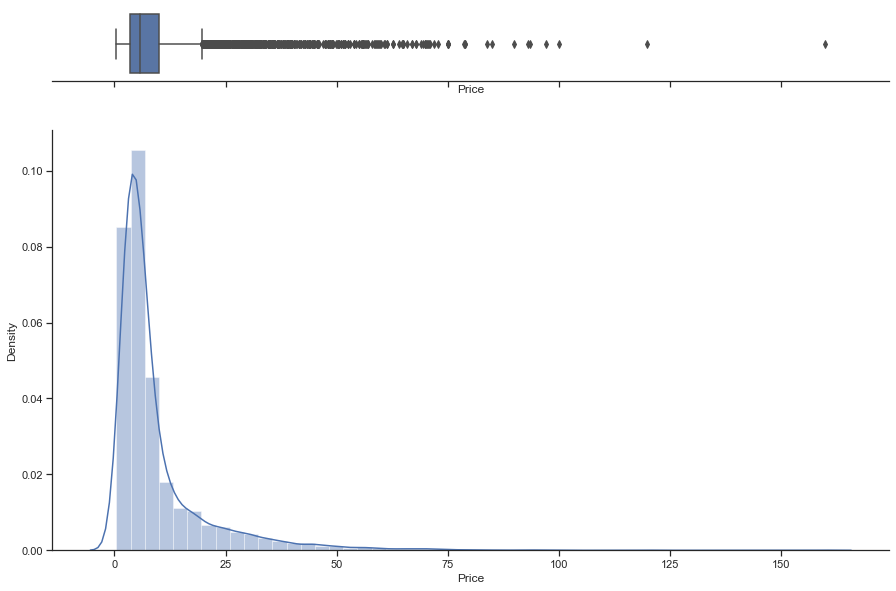

In [18]:
#import warning to supress in out
import warnings
#supress warning 
warnings.filterwarnings('ignore')
#set plot style
sns.set(style="ticks")
#set x equals to column of our interest which is age here
x=cData['Price']
#create figure f, boxplot and histogram in single chart        
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})
#set input in boxplot
sns.boxplot(x, ax=ax_box)
#set input in histogram
sns.distplot(x, ax=ax_hist)
ax_box.set(yticks=[])
#plot the histogram
sns.despine(ax=ax_hist)
#plot the  boxplot 
sns.despine(ax=ax_box, left=True)

# Exploratory Analysis
### Price
#### Histogram and Boxplot for Price
1. It shows average Power of a car
2. It shows the frequency of Power for the cars

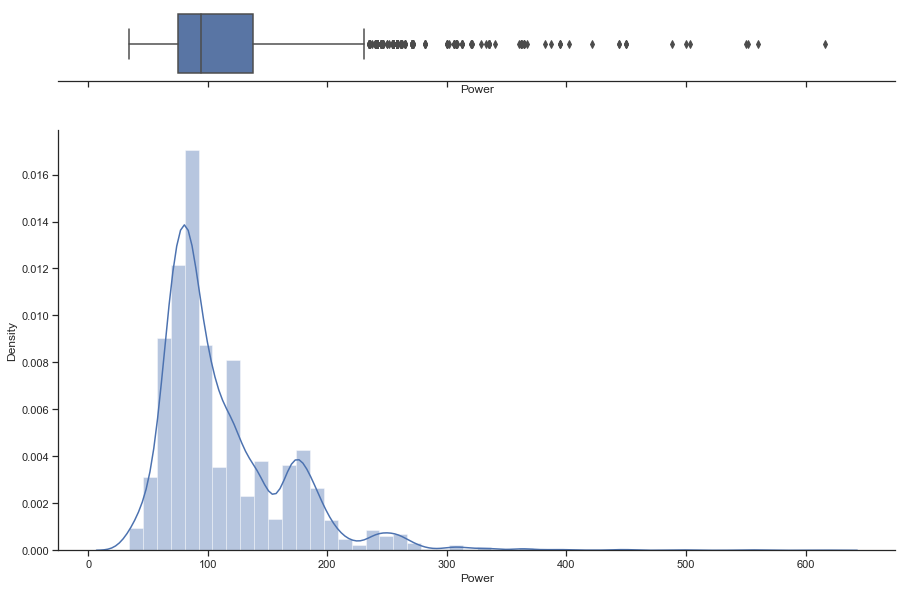

In [19]:
#import warning to supress in out
import warnings
#supress warning 
warnings.filterwarnings('ignore')
#set plot style
sns.set(style="ticks")
#set x equals to column of our interest which is age here
x=cData['Power']
#create figure f, boxplot and histogram in single chart        
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})
#set input in boxplot
sns.boxplot(x, ax=ax_box)
#set input in histogram
sns.distplot(x, ax=ax_hist)
ax_box.set(yticks=[])
#plot the histogram
sns.despine(ax=ax_hist)
#plot the  boxplot 
sns.despine(ax=ax_box, left=True)

# Exploratory Analysis
### New Price
#### Histogram and Boxplot for New Price
1. It shows average New Price of a car
2. It shows the frequency of New Price for the cars

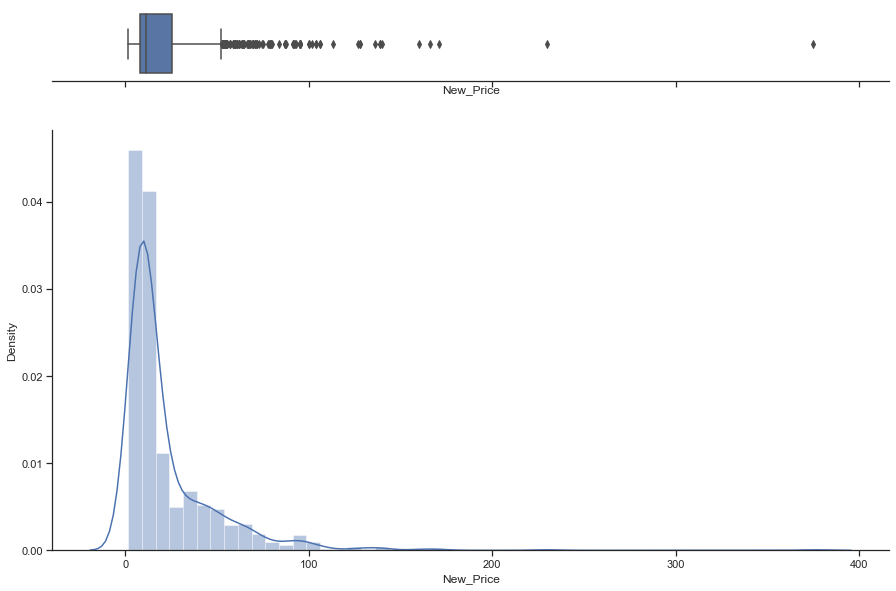

In [20]:
#import warning to supress in out
import warnings
#supress warning 
warnings.filterwarnings('ignore')
#set plot style
sns.set(style="ticks")
#set x equals to column of our interest which is age here
x=cData['New_Price']
#create figure f, boxplot and histogram in single chart        
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})
#set input in boxplot
sns.boxplot(x, ax=ax_box)
#set input in histogram
sns.distplot(x, ax=ax_hist)
ax_box.set(yticks=[])
#plot the histogram
sns.despine(ax=ax_hist)
#plot the  boxplot 
sns.despine(ax=ax_box, left=True)

# Exploratory Analysis
### Kilometer driven
#### Histogram and Boxplot for Kilometer driven
1. Shows the skewness of number of kilometer driven

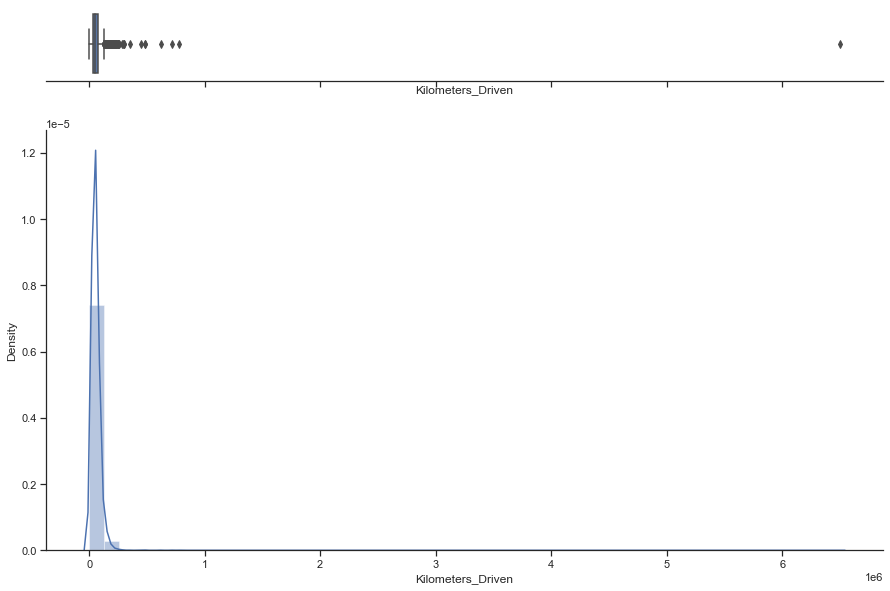

In [21]:
#creating box plot for Owner Type vs price
#import warning to supress in out
import warnings
#supress warning 
warnings.filterwarnings('ignore')
#set plot style
sns.set(style="ticks")
#set x equals to column of our interest which is age here
x=cData['Kilometers_Driven']
#create figure f, boxplot and histogram in single chart        
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})
#set input in boxplot
sns.boxplot(x, ax=ax_box)
#set input in histogram
sns.distplot(x, ax=ax_hist)
ax_box.set(yticks=[])
#plot the histogram
sns.despine(ax=ax_hist)
#plot the  boxplot 
sns.despine(ax=ax_box, left=True)

# Exploratory Analysis
### Location VS Price
#### Boxplot for Location VS Price
1. It shows the relation of Location and Price of a car

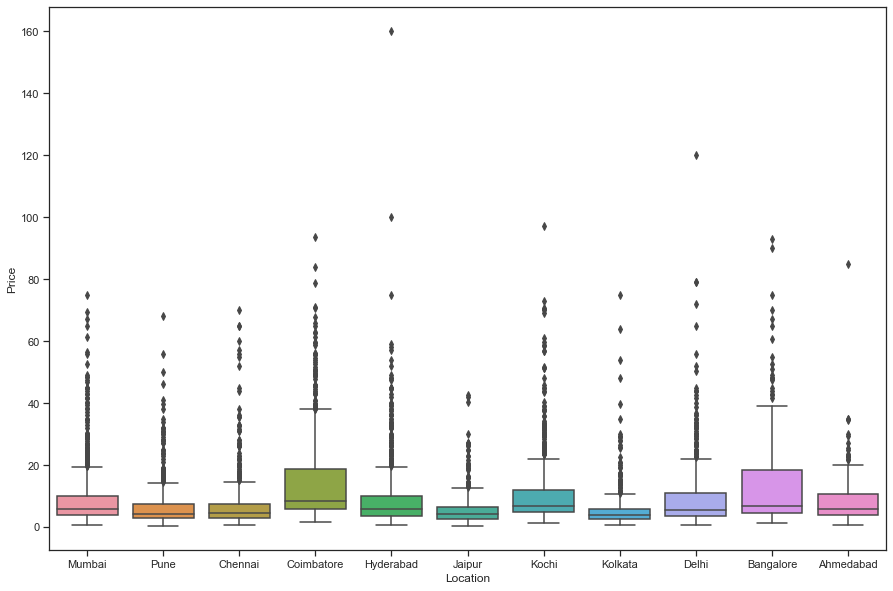

In [22]:
#creating box plot for children vs bmi from dataset 
ax = sns.boxplot(x="Location", y="Price", data=cData)

# Exploratory Analysis
### owner type VS Price
### Barplot for Transmission VS Price
1. It shows the relation of owner type and Price of a car

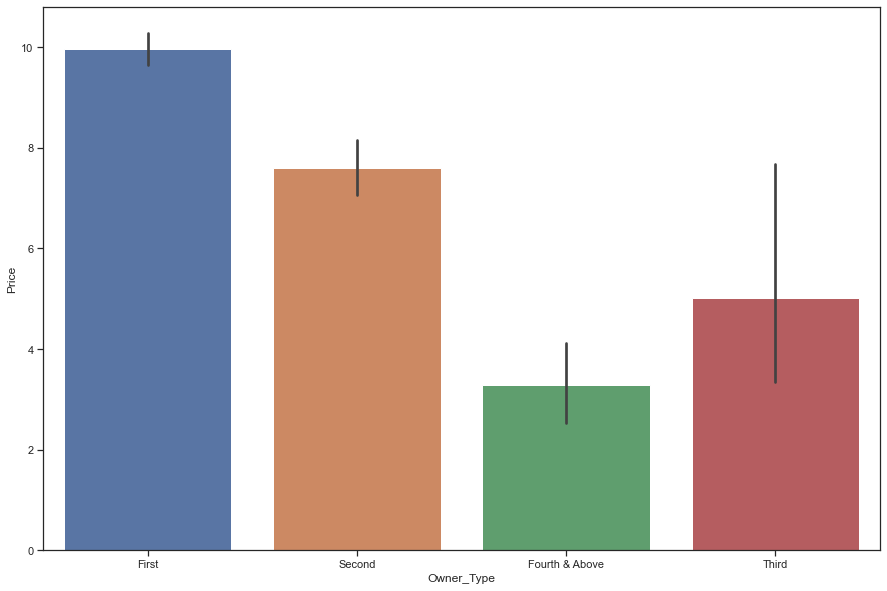

In [23]:
#creating box plot for Owner Type vs price
ax = sns.barplot(x="Owner_Type", y="Price", data=cData)

# Bar plot
### Price vs transmission
1. Shows relation between price and transmission

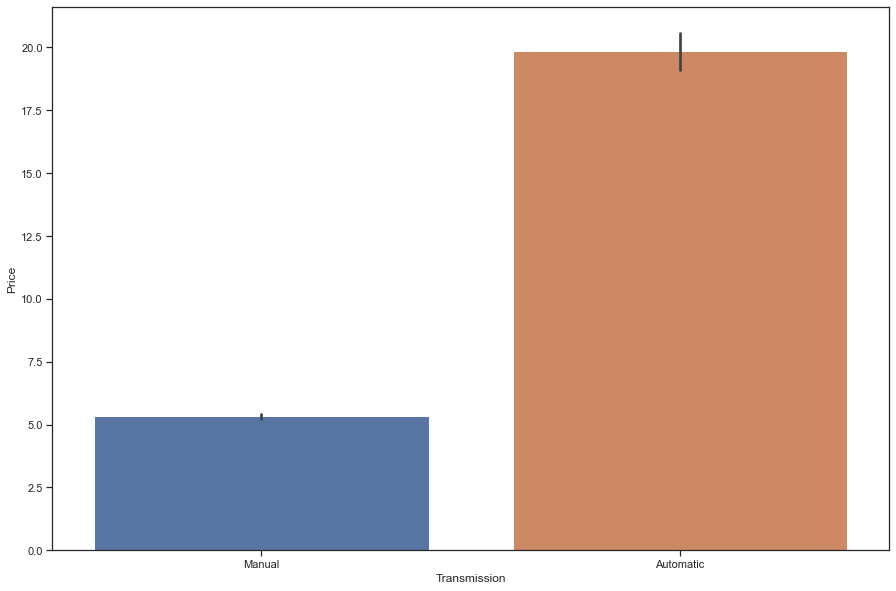

In [24]:
#creating bar plot for price vs transmission
ax = sns.barplot(x="Transmission", y="Price", data=cData)

# Bar plot
### Price vs Fuel
1. Shows relation between price and Fuel

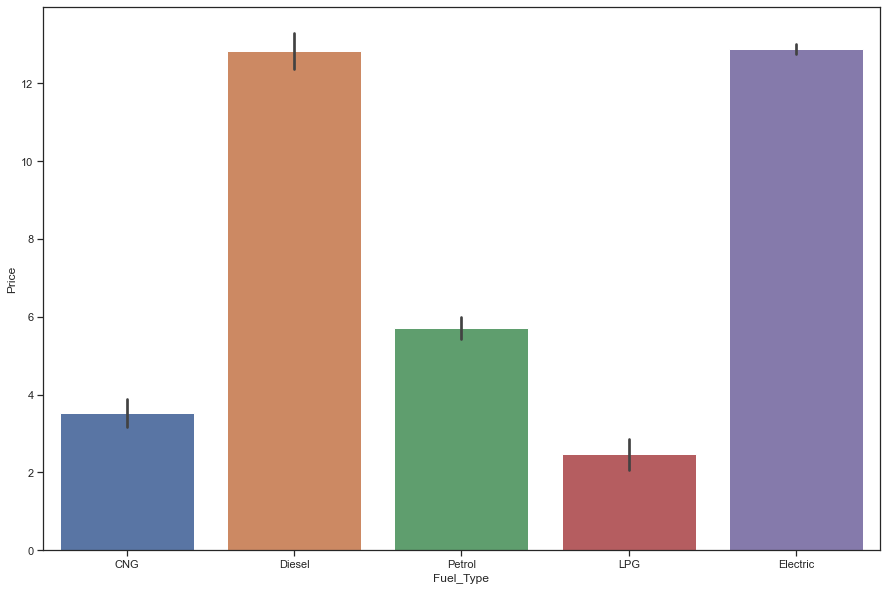

In [25]:
#creating bar plot for price vs transmission
ax = sns.barplot(x="Fuel_Type", y="Price", data=cData)

In [26]:
# Bar plot
### Price vs Car
### Shows relation between price and Car

[Text(0, 0, 'Maruti'),
 Text(1, 0, 'Hyundai'),
 Text(2, 0, 'Honda'),
 Text(3, 0, 'Audi'),
 Text(4, 0, 'Nissan'),
 Text(5, 0, 'Toyota'),
 Text(6, 0, 'Volkswagen'),
 Text(7, 0, 'Tata'),
 Text(8, 0, 'Land'),
 Text(9, 0, 'Mitsubishi'),
 Text(10, 0, 'Renault'),
 Text(11, 0, 'Mercedes-Benz'),
 Text(12, 0, 'BMW'),
 Text(13, 0, 'Mahindra'),
 Text(14, 0, 'Ford'),
 Text(15, 0, 'Porsche'),
 Text(16, 0, 'Datsun'),
 Text(17, 0, 'Jaguar'),
 Text(18, 0, 'Volvo'),
 Text(19, 0, 'Chevrolet'),
 Text(20, 0, 'Skoda'),
 Text(21, 0, 'Mini'),
 Text(22, 0, 'Fiat'),
 Text(23, 0, 'Jeep'),
 Text(24, 0, 'Smart'),
 Text(25, 0, 'Ambassador'),
 Text(26, 0, 'Isuzu'),
 Text(27, 0, 'ISUZU'),
 Text(28, 0, 'Force'),
 Text(29, 0, 'Bentley'),
 Text(30, 0, 'Lamborghini'),
 Text(31, 0, 'Hindustan'),
 Text(32, 0, 'OpelCorsa')]

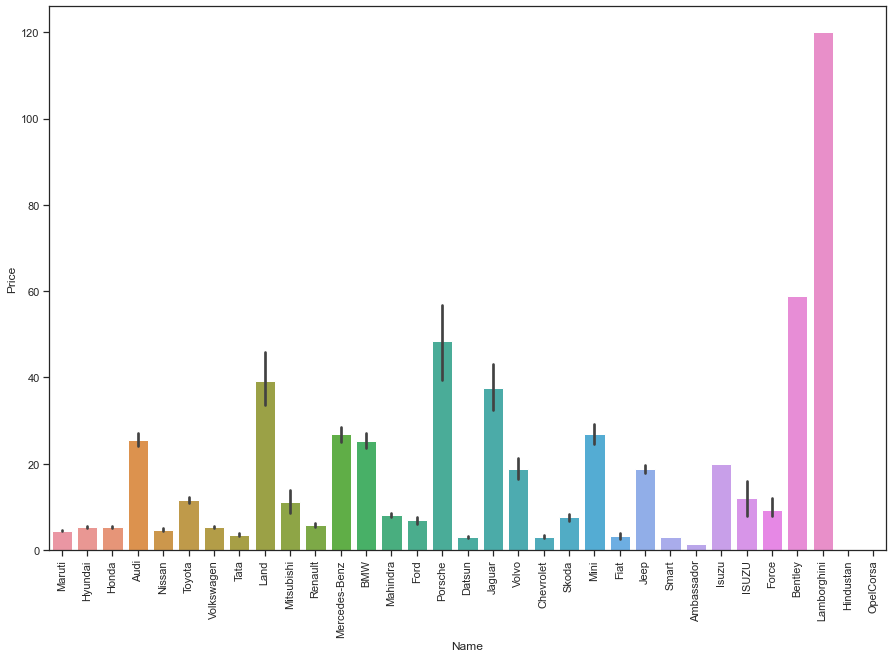

In [27]:
#creating bar plot for price vs Car
ax = sns.barplot(x="Name", y="Price", data=cData)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Exploratory Analysis
### Price VS Mileage VS Transmission
#### Boxplot for Price VS Mileage VS Transmission
1. It shows the relation of price of car with Mileage for different tranmission type

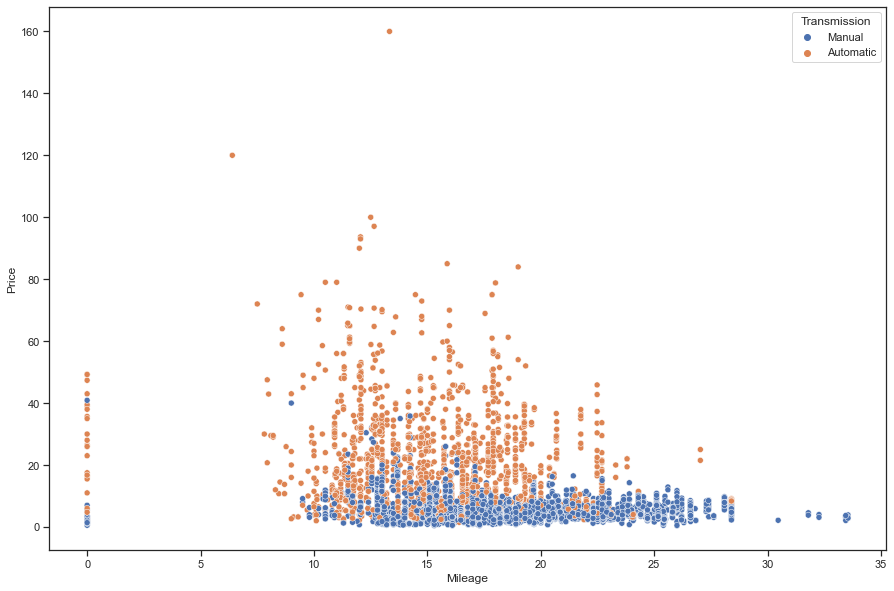

In [28]:
#creating scatter plot for charges vs bmi vs sex from dataset 
ax = sns.scatterplot(x="Mileage", y="Price",hue='Transmission', data=cData)

# Exploratory Analysis
### Price VS Engine VS Transmission
#### Boxplot for Price VS Engine VS Transmission
1. It shows the relation of price of car with Engine for different tranmission type

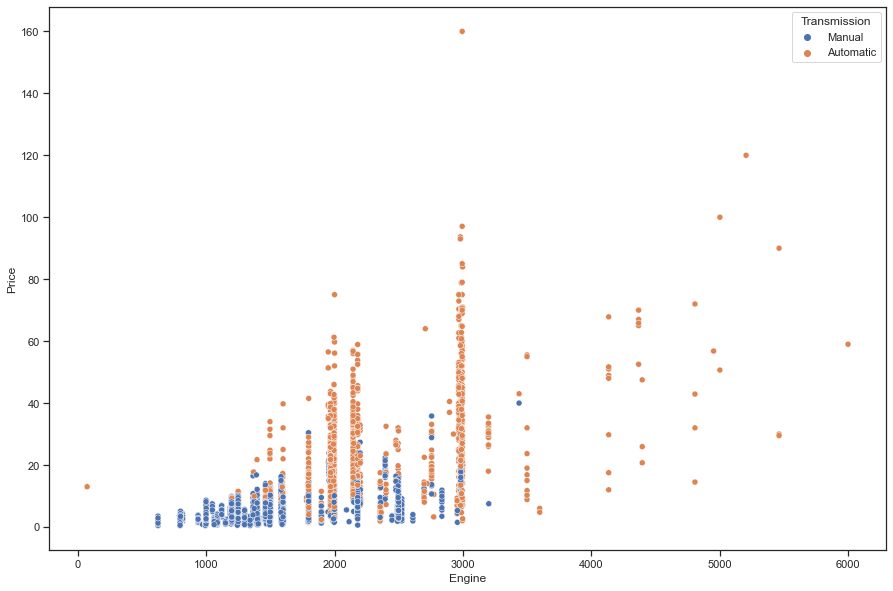

In [29]:
#creating scatter plot for engine vs price vs transmission from dataset 
ax = sns.scatterplot(x="Engine", y="Price",hue='Transmission', data=cData)

# Exploratory Analysis
### Price VS Year VS Transmission
#### Boxplot for Price VS Year VS Transmission
1. It shows the relation of price of car with Year for different tranmission type

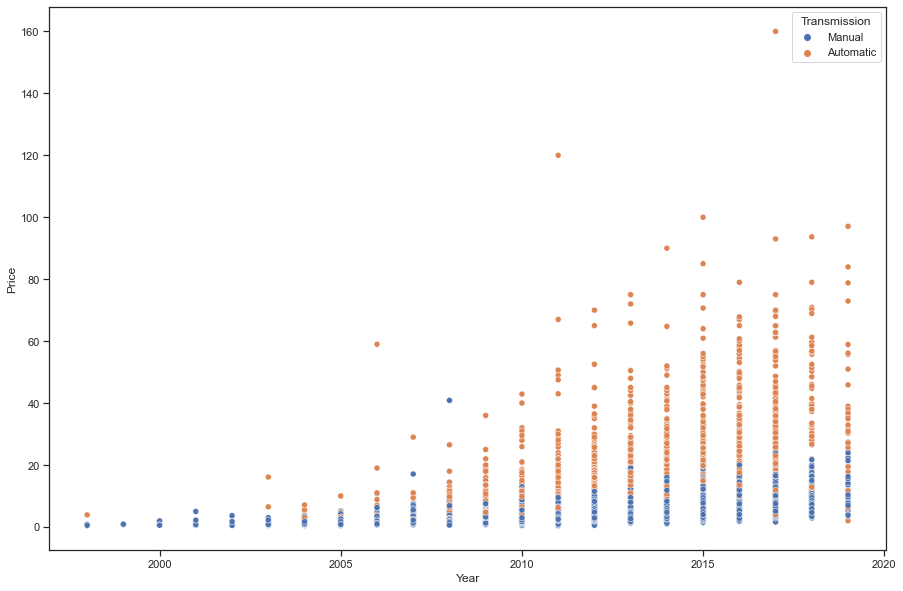

In [30]:
#creating scatter plot for year vs price vs transmission from dataset 
ax = sns.scatterplot(x="Year", y="Price",hue='Transmission', data=cData)

<AxesSubplot:>

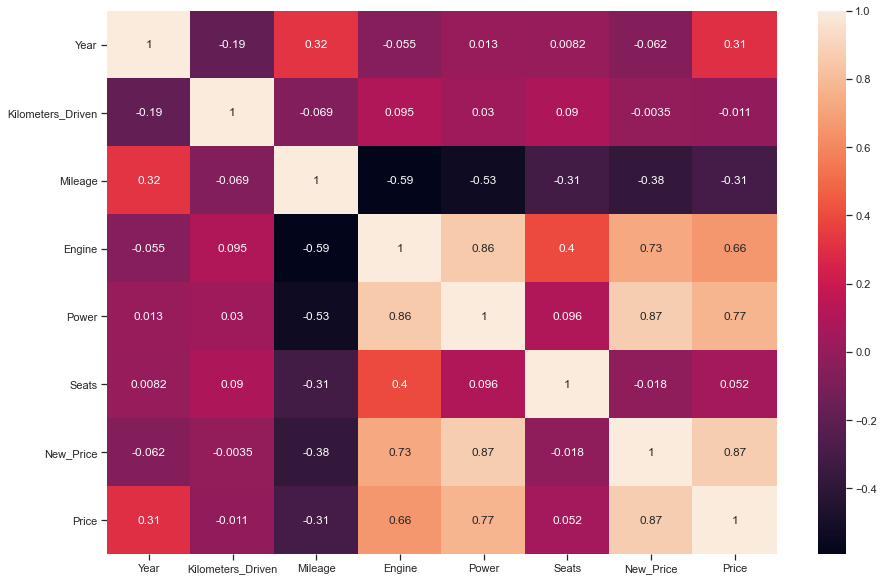

In [31]:
#create a correlation chart from dataset annot is true because it put values in each square
sns.heatmap(cData.corr(),annot = True)

In [32]:
cData.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64

# Create Dummy Variables
Values like 'america' cannot be read into an equation. Using substitutes like 1 for america, 2 for europe and 3 for asia would end up implying that european cars fall exactly half way between american and asian cars! we dont want to impose such an baseless assumption!
So we create 3 simple true or false columns with titles equivalent to "Is this car America?", "Is this care European?" and "Is this car Asian?". These will be used as independent variables without imposing any kind of ordering between the three regions.

In [33]:
cData = cData.drop(['Name'], axis=1)
cData = pd.get_dummies(cData, columns=['Fuel_Type','Transmission','Owner_Type','Location'])
cData.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_CNG,Fuel_Type_Diesel,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2010,72000,26.60,998.0,58.16,5.0,NaN,1.75,1,0,...,0,0,0,0,0,0,0,0,1,0
1,2015,41000,19.67,1582.0,126.20,5.0,NaN,12.50,0,1,...,0,0,0,0,0,0,0,0,0,1
2,2011,46000,18.20,1199.0,88.70,5.0,8.61,4.50,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,NaN,6.00,0,1,...,0,1,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,NaN,17.74,0,1,...,0,0,1,0,0,0,0,0,0,0


# Dealing with missing values

In [34]:
from sklearn.impute import SimpleImputer
impute_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
impute_mean.fit(cData)
cData=impute_mean.transform(cData)
cData=pd.DataFrame(cData,columns =['Year',
'Kilometers_Driven',
'Mileage',
'Engine',
'Power',
'Seats',
'New_Price',
'Price',
'Fuel_Type_CNG',
'Fuel_Type_Diesel',
'Fuel_Type_Electric',
'Fuel_Type_LPG',
'Fuel_Type_Petrol',
'Transmission_Automatic',
'Transmission_Manual',
'Owner_Type_First',
'Owner_Type_Fourth & Above',
'Owner_Type_Second',
'Owner_Type_Third',
'Location_Ahmedabad',
'Location_Bangalore',
'Location_Chennai',
'Location_Coimbatore',
'Location_Delhi',
'Location_Hyderabad',
'Location_Jaipur',
'Location_Kochi',
'Location_Kolkata','Location_Mumbai','Location_Pune'])
cData

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_CNG,Fuel_Type_Diesel,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2010.0,72000.0,26.60,998.0,58.16,5.0,22.624205,1.750000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2015.0,41000.0,19.67,1582.0,126.20,5.0,22.624205,12.500000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2011.0,46000.0,18.20,1199.0,88.70,5.0,8.610000,4.500000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012.0,87000.0,20.77,1248.0,88.76,7.0,22.624205,6.000000,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013.0,40670.0,15.20,1968.0,140.80,5.0,22.624205,17.740000,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,2011.0,89411.0,20.54,1598.0,103.60,5.0,22.624205,9.479468,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7249,2015.0,59000.0,17.21,1197.0,103.60,5.0,22.624205,9.479468,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7250,2012.0,28000.0,23.08,1461.0,63.10,5.0,22.624205,9.479468,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7251,2013.0,52262.0,17.20,1197.0,103.60,5.0,22.624205,9.479468,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
cData.isnull().sum()

Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
New_Price                    0
Price                        0
Fuel_Type_CNG                0
Fuel_Type_Diesel             0
Fuel_Type_Electric           0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Transmission_Automatic       0
Transmission_Manual          0
Owner_Type_First             0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
Location_Ahmedabad           0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
dtype: int64

There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. of the 398 rows 6 have NAN in the hp column. We could drop those 6 rows - which might not be a good idea under all situations


## BiVariate Plots

A bivariate analysis among the different variables can be done using scatter matrix plot. Seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file. 

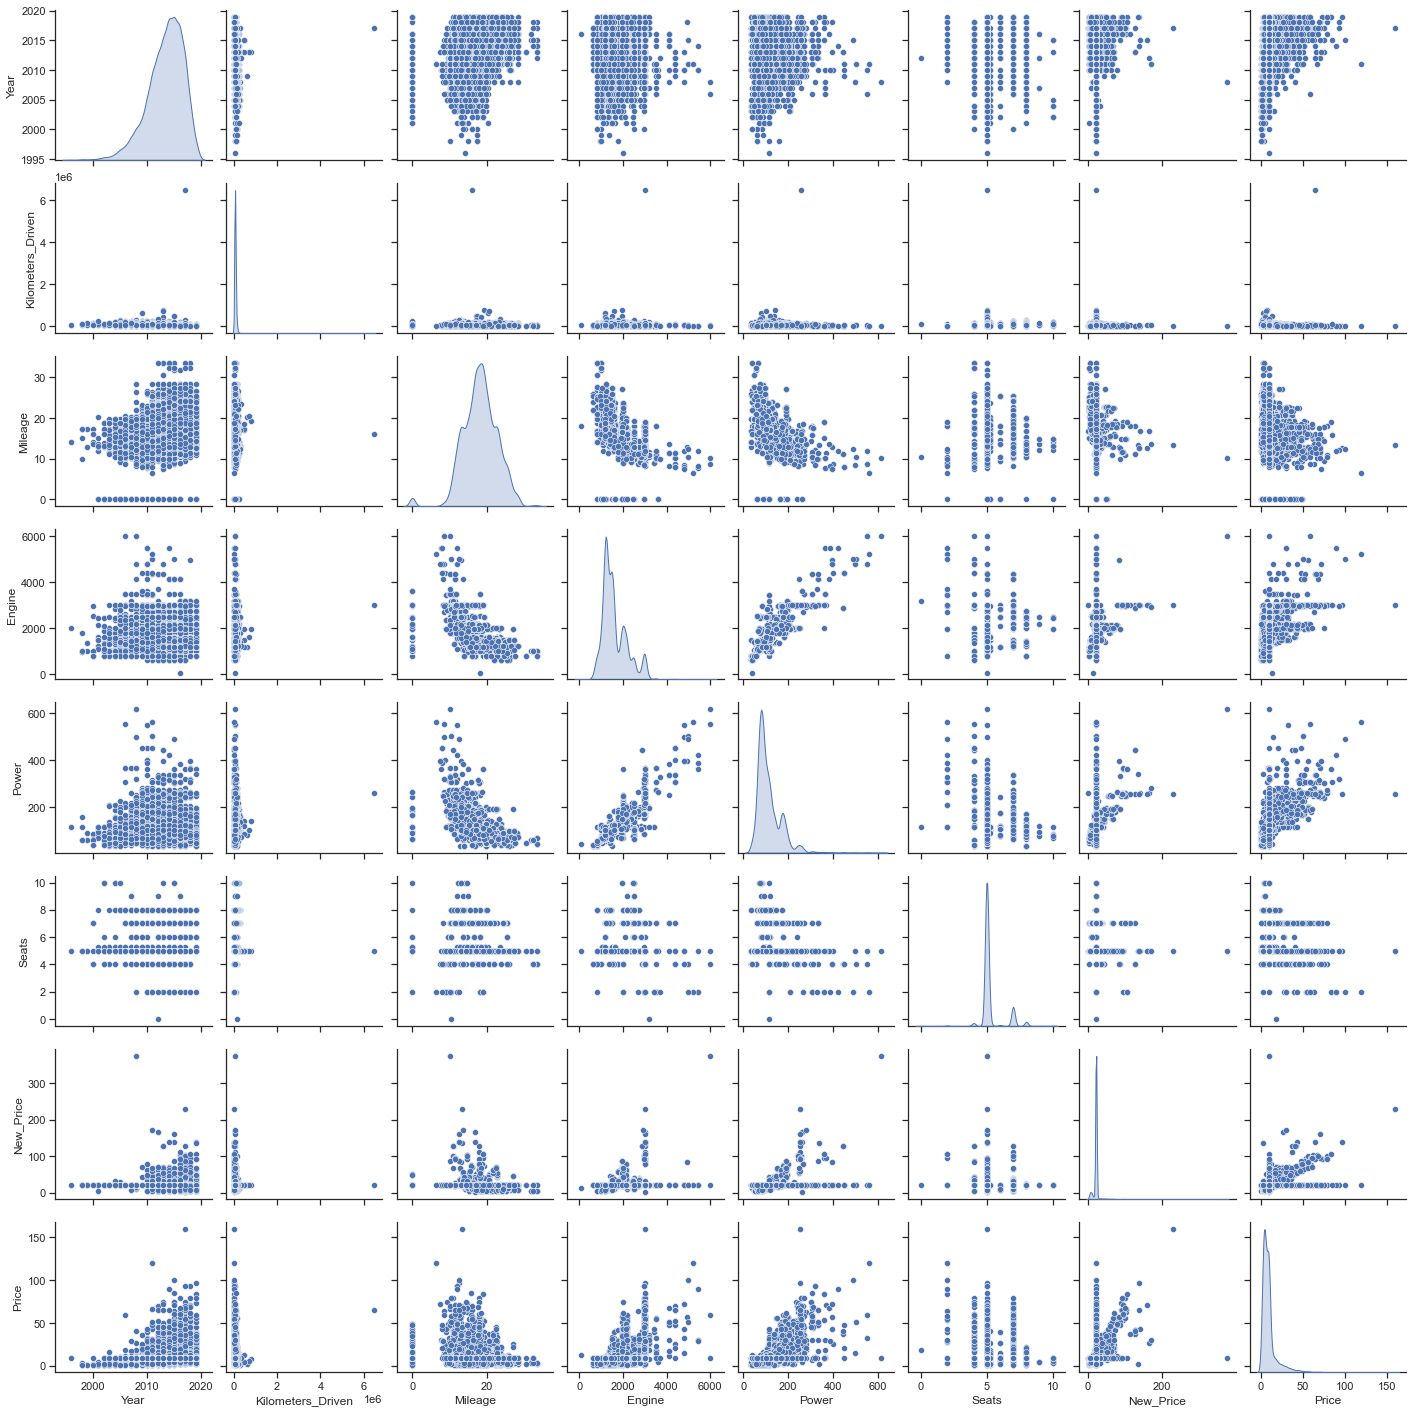

In [36]:
cData_attr = cData.iloc[:, 0:8]
sns.pairplot(cData_attr, diag_kind='kde')   # to plot density curve instead of histogram on the diag

# Exploratory Analysis
### Year VS Price
#### Boxplot for Year VS Price
1. It shows the relation of Year and Price of a car

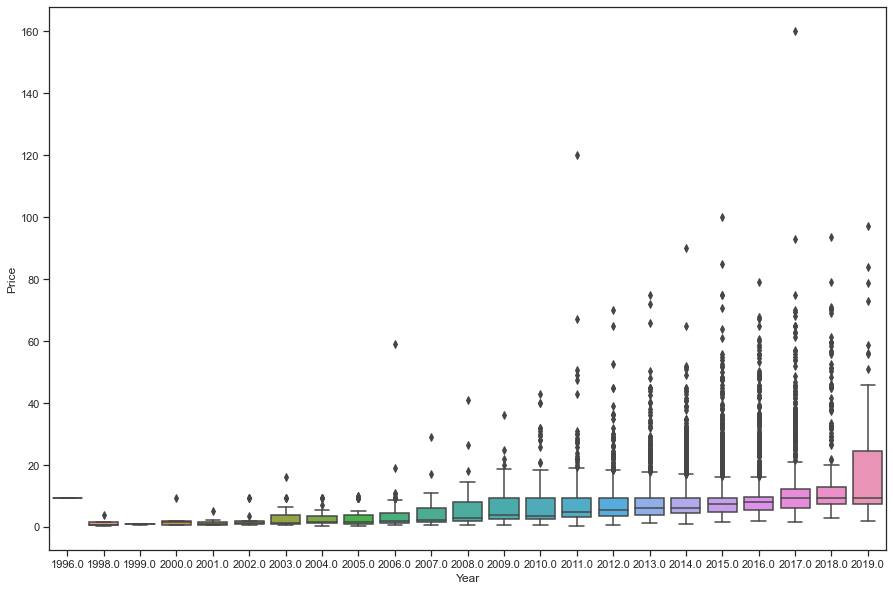

In [37]:
#creating box plot for children vs bmi from dataset 
ax = sns.boxplot(x="Year", y="Price", data=cData)

# Exploratory Analysis
### Seats VS Price
#### Boxplot for Seats VS Price
1. It shows the relation of Seats and Price of a car

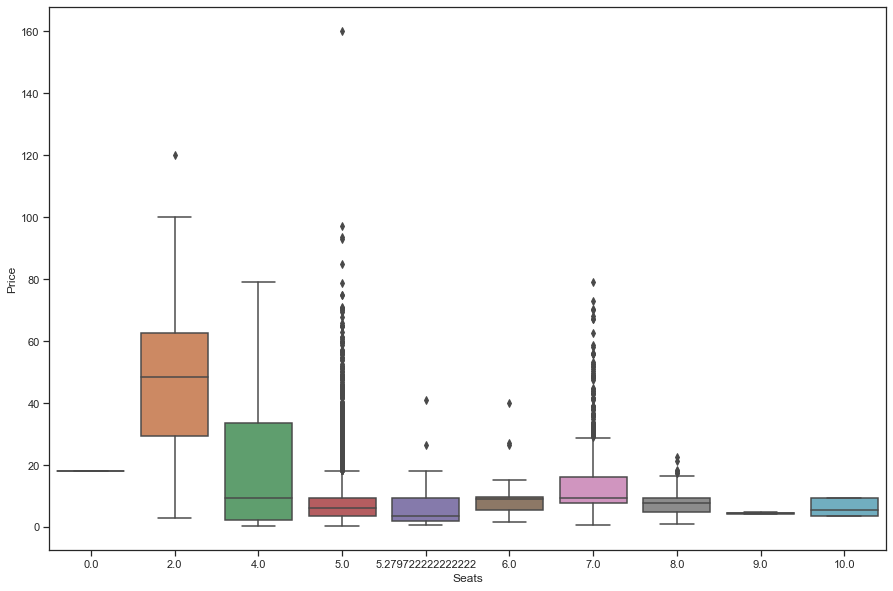

In [38]:
#creating box plot for children vs bmi from dataset 
ax = sns.boxplot(x="Seats", y="Price", data=cData)

Observation between 'mpg' and other attributes indicate the relationship is not really linear. However, the plots also indicate that linearity would still capture quite a bit of useful information/pattern. Several assumptions of classical linear regression seem to be violated, including the assumption of no Heteroscedasticity


## Split Data

In [39]:
# lets build our linear model
# independant variables
X = cData.drop(['New_Price','Price'], axis=1)
# the dependent variable
y = cData[['Price']]

In [40]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X.iloc[:,2:], y, test_size=0.30, random_state=1)

## Fit Linear Model

In [41]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

Here are the coefficients for each variable and the intercept

In [42]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Mileage is 0.10115098316531644
The coefficient for Engine is 0.0006701416784291919
The coefficient for Power is 0.10597366739844959
The coefficient for Seats is -0.13215801955061254
The coefficient for Fuel_Type_CNG is 0.3536974176874576
The coefficient for Fuel_Type_Diesel is 0.40932264706572963
The coefficient for Fuel_Type_Electric is -8.881784197001252e-16
The coefficient for Fuel_Type_LPG is 0.5902815278670164
The coefficient for Fuel_Type_Petrol is -1.3533015926202012
The coefficient for Transmission_Automatic is 1.6304300409190642
The coefficient for Transmission_Manual is -1.630430040919063
The coefficient for Owner_Type_First is 2.246340030217564
The coefficient for Owner_Type_Fourth & Above is -1.3017573464793113
The coefficient for Owner_Type_Second is 0.11737846715633968
The coefficient for Owner_Type_Third is -1.0619611508945959
The coefficient for Location_Ahmedabad is -0.6176889868160973
The coefficient for Location_Bangalore is 1.0629002211265366
The

In [43]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -5.529337293223028


# Predictions
Here we are showing top 5 rows of car for which our model is predicting the price

In [44]:
X_test.head()

,Mileage,Engine,Power,Seats,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
2397,17.0,1497.0,121.36,5.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3777,21.5,1197.0,81.80,5.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4425,13.1,2499.0,141.00,7.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3661,13.0,2143.0,201.10,5.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4514,16.9,1197.0,82.00,5.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Price
Here are showing the price our model predicted

In [45]:
results=regression_model.predict(X_test)
results
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
print(mean_absolute_error(results,y_test))
print(median_absolute_error(results,y_test))

4.059794276249562
2.3832859750286173


### 5 predictions for the cars shown 5 cars shown for test set

In [46]:
results[0:5]

array([[ 7.09586609],
       [ 5.70458897],
       [12.51668896],
       [24.99162465],
       [ 8.52134926]])

The score (R^2) for in-sample and out of sample

In [47]:
regression_model.score(X_train, y_train)

0.5354855674837531

In [48]:
#out of sample score (R^2)

regression_model.score(X_test, y_test)

0.5608156919913425

## Adding interaction terms 


In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.6100107177174634


Polynomial Features (with only interaction terms) have improved the Out of sample R^2. However at the cost of increaing the number of variables significantly. 
